# Email spam detection using python


Reading and Understanding of Data



In [1]:

#Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
     

In [3]:
df = pd.read_csv('spam_ham_dataset.csv')
df


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
# Showing First 5 Rows
df.head()
     

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
# Showing Last 5 Rows
df.tail()


,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [6]:
# Showing no. of rows and columns in the data
df.shape



(5171, 4)

In [7]:
# Showing columns of the dataset
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [9]:
# Checking for Duplicated Values
df.duplicated().sum()

0

In [10]:
# Checking for null values
df.isna().sum() # no null values

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [11]:
# Showing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [12]:
# Showing Statistical summary of the data
df.describe()


,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'label_num'}>]], dtype=object)

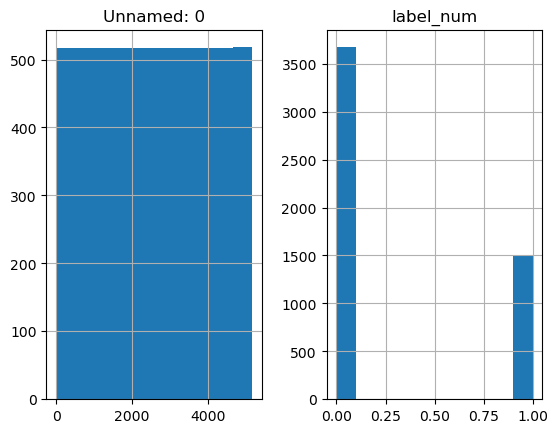

In [14]:
df.hist()


Dropping some Unnecessary Columns



In [15]:
# Dropping column
df.drop('Unnamed: 0', axis=1 , inplace=True)
df


,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [16]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [17]:
df['label_num'].value_counts()


0    3672
1    1499
Name: label_num, dtype: int64

In [18]:
# Dropping 'label_num' Column
del df['label_num']
df

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


Renaming the columns



In [19]:
# Renaming Column Names
df.columns = ['Category','Subject']

# checking for column names
df.columns

Index(['Category', 'Subject'], dtype='object')

In [20]:
# Showing Unique Values of Category column
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

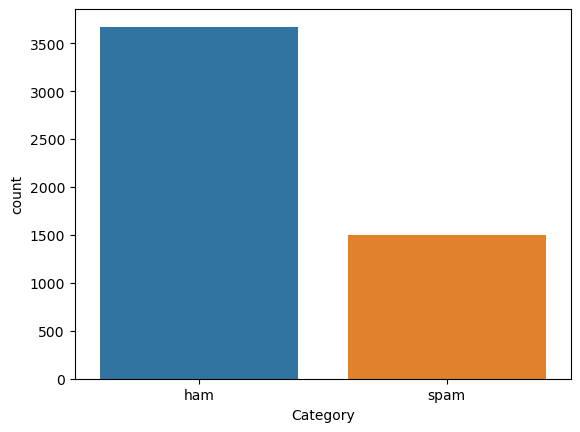

In [21]:
# Plotting Countplot for Category Column
sns.countplot(data = df , x = 'Category')
plt.show()

This Plot Clearly Shows that most of the mails are ham which means they are not spam mails.

In [22]:
# Checking for Duplicated Values
df.duplicated().sum()

178

In [23]:
# Dropping Duplicated Values
df.drop_duplicates()

,Category,Subject
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch..."
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169,ham,Subject: industrial worksheets for august 2000...


# Data Cleaning

1. Category Column



In [24]:
# labelling ham with 0 and spam with 1 for linear regression
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1
df

,Category,Subject
0,1,Subject: enron methanol ; meter # : 988291\r\n...
1,1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,1,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,0,"Subject: photoshop , windows , office . cheap ..."
4,1,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,1,Subject: put the 10 on the ft\r\nthe transport...
5167,1,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,1,Subject: calpine daily gas nomination\r\n>\r\n...
5169,1,Subject: industrial worksheets for august 2000...


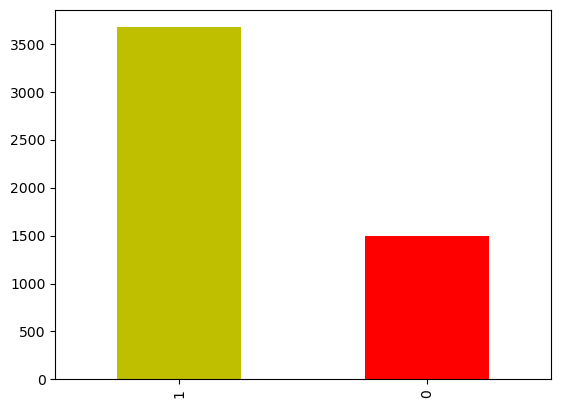

In [25]:
# Plotting barplot for Count of Category Column
df['Category'].value_counts().plot(kind='bar',color=('y','r'))
plt.show()

2. Subject Column

In [26]:
# Showing first row of Subject column 
df['Subject'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [28]:
from nltk.tokenize import RegexpTokenizer

In [29]:
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower() #converting string into lowercase
    tokens = reg.tokenize(string) # tokenize the string on the defined pattern
    return " ".join(tokens) # joining the tokens with single space character and returning the output
     

In [30]:
# Applying lambda function for changing the data of 'Subject' Column
df['Subject'] = df['Subject'].apply(lambda string: clean_str(string))
     

In [31]:
df['Subject'][0]


'subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes'

In [32]:

# checking the data after cleaning
df.head()
     

,Category,Subject
0,1,subject enron methanol meter this is a follow ...
1,1,subject hpl nom for january see attached file ...
2,1,subject neon retreat ho ho ho we re around to ...
3,0,subject photoshop windows office cheap main tr...
4,1,subject re indian springs this deal is to book...


Separating the data as Category and Subject

In [33]:
X = df['Category']

Y = df['Subject']


In [34]:
print(X)


0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: Category, Length: 5171, dtype: object


In [35]:
print(Y)


0       subject enron methanol meter this is a follow ...
1       subject hpl nom for january see attached file ...
2       subject neon retreat ho ho ho we re around to ...
3       subject photoshop windows office cheap main tr...
4       subject re indian springs this deal is to book...
                              ...                        
5166    subject put the on the ft the transport volume...
5167    subject and following noms hpl can t take the ...
5168    subject calpine daily gas nomination julie as ...
5169    subject industrial worksheets for august activ...
5170    subject important online banking alert dear va...
Name: Subject, Length: 5171, dtype: object


Splitting the data into training data & test data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train = X_train.astype('int')
X_test = X_test.astype('int')

print(X.shape)
print(X_train.shape)
print(X_test.shape)
     

(5171,)
(4136,)
(1035,)


In [38]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)


In [39]:
Y_train_featured = feature_extraction.fit_transform(Y_train)
Y_test_featured = feature_extraction.transform(Y_test)
     


In [40]:
print(Y_train)


3628    subject meter scherlyn per our conversation he...
2491    subject natural gas nomination for enron metha...
3262    subject cleburne outage gentlemen i wanted to ...
2972    subject daren the firm trading waha book has b...
2481    subject re mon feb page loading image not show...
                              ...                        
4931    subject re pretty boy wants to meet his soulma...
3264    subject if you need to make money learn from t...
1653    subject find out where to buy drugs cheap find...
2607    subject job survey and matching heather darren...
2732    subject forwarded by tom acton corp enron on p...
Name: Subject, Length: 4136, dtype: object


In [41]:
print(Y_train_featured)

  (0, 34843)	0.209674553125394
  (0, 17597)	0.21749164358073084
  (0, 35016)	0.25752744732861527
  (0, 24052)	0.14133037133722523
  (0, 12362)	0.23041955710463574
  (0, 21064)	0.18690079795641928
  (0, 20012)	0.12219812145536768
  (0, 20732)	0.1316413681304691
  (0, 31462)	0.25306377591220497
  (0, 34391)	0.17408496520088396
  (0, 8128)	0.16346769341772793
  (0, 23933)	0.18952860841730024
  (0, 21914)	0.18797819133930524
  (0, 13535)	0.21436091487202985
  (0, 23262)	0.21360930091171546
  (0, 8188)	0.2691224181448108
  (0, 30756)	0.41209823477907254
  (0, 22615)	0.4167946496245476
  (0, 33287)	0.04772650009362891
  (1, 26953)	0.12968696823568582
  (1, 23312)	0.16840793303087576
  (1, 23480)	0.1892561946689478
  (1, 11794)	0.19616932840527507
  (1, 9379)	0.19252222664107874
  (1, 23050)	0.2038437513299149
  :	:
  (4135, 15758)	0.12162838130188036
  (4135, 389)	0.26723642070815484
  (4135, 28828)	0.10925795588389492
  (4135, 23260)	0.08506967613644434
  (4135, 32084)	0.1104144485252494
  

Logistic Regression



In [42]:
model = LogisticRegression()


In [43]:
# Training the Logistic Regression model
model.fit(Y_train_featured,X_train)


LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

Accuracy of prediction on training data


In [46]:
Prediction_on_train_data = model.predict(Y_train_featured)
accuracy_on_train_data = accuracy_score(X_train,Prediction_on_train_data)
print('Accuracy_on_train_data : ', accuracy_on_train_data*100)
     

Accuracy_on_train_data :  99.63733075435202


In [47]:
Prediction_on_test_data = model.predict(Y_test_featured)
accuracy_on_test_data = accuracy_score(X_test,Prediction_on_test_data)
print('Accuracy_on_test_data : ',accuracy_on_test_data*100)

Accuracy_on_test_data :  98.74396135265701


submitted by 
Abin K Prakash